# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Autoencoder in KERAS for image anomaly detection

</font>
</div>

# What is an autoencoder?

<div class="alert alert-block alert-info">
<font color=black><br>

- Autoencoder are classified as unsupervised learning.
- It learns how to efficiently compress and encode data then learns how to reconstruct the data back from the reduced encoded representation.
- The reconstruction is not perfect but very close to the original input as possible.
- **By design**, reduces data dimensions by learning how to ignore the noise in the data.
- When we force a model to become an identity function (read **repruce** the input), we are forcing it to store all of the data’s relevant features in a compressed representation so that there is enough information in that compressed form such that the model can ‘accurately’ reconstruct it. 
- Autoencoders may be thought of as being a special case of **feedforward networks** and may be trained with all the same techniques, typically minibatch gradient and back-propagation.
- However, the architecture for autoencoders can vary between a simple FeedForward network, LSTM network or Convolutional Neural Network depending. 

<br></font>
</div>

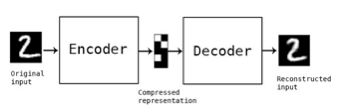

# Goal?

<div class="alert alert-block alert-info">
<font color=black><br>

- One of the application there are used for is anomaly detection.
- If you have correlated input data, the autoencoder method will work very well because the encoding operation relies on the correlated features to compress the data.

<br></font>
</div>

# Import modules

In [24]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras import optimizers
from keras.optimizers import Adam
from keras.preprocessing import image
from IPython.display import Image

# Import dataset

<div class="alert alert-block alert-info">
<font color=black><br>

- We'll used the MNIST dataset

<br></font>
</div>

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

# Building an autoencoder

<div class="alert alert-block alert-info">
<font color=black><br>

- The autoencoder will be a simple FeedForward NN with 6 layers

<br></font>
</div>

In [5]:
autoencoder = Sequential()
autoencoder.add(Dense(512,  activation = 'elu', input_shape = (784,)))
autoencoder.add(Dense(128,  activation = 'elu'))
autoencoder.add(Dense(10,   activation = 'linear', name= "bottleneck"))
autoencoder.add(Dense(128,  activation = 'elu'))
autoencoder.add(Dense(512,  activation = 'elu'))
autoencoder.add(Dense(784,  activation = 'sigmoid'))
autoencoder.compile(loss = 'mean_squared_error', optimizer = Adam())

In [16]:
#dir(autoencoder)
autoencoder.layers

In [6]:
trained_model = autoencoder.fit(train_x, train_x, batch_size=1024, epochs=10, verbose=1, validation_data=(val_x, val_x))
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
# Bottleneck representation
encoded_data = encoder.predict(train_x)  
# Reconstruction
decoded_output = autoencoder.predict(train_x)        
encoding_dim = 10

Epoch 1/10
59/59 [==============================] - 13s 40ms/step - loss: 0.1088 - val_loss: 0.0500
Epoch 2/10
59/59 [==============================] - 2s 34ms/step - loss: 0.0464 - val_loss: 0.0370
Epoch 3/10
59/59 [==============================] - 2s 35ms/step - loss: 0.0356 - val_loss: 0.0298
Epoch 4/10
59/59 [==============================] - 2s 34ms/step - loss: 0.0295 - val_loss: 0.0264
Epoch 5/10
59/59 [==============================] - 2s 35ms/step - loss: 0.0262 - val_loss: 0.0242
Epoch 6/10
59/59 [==============================] - 2s 34ms/step - loss: 0.0243 - val_loss: 0.0227
Epoch 7/10
59/59 [==============================] - 2s 35ms/step - loss: 0.0228 - val_loss: 0.0215
Epoch 8/10
59/59 [==============================] - 2s 35ms/step - loss: 0.0216 - val_loss: 0.0207
Epoch 9/10
59/59 [==============================] - 2s 33ms/step - loss: 0.0207 - val_loss: 0.0199
Epoch 10/10
59/59 [==============================] - 2s 34ms/step - loss: 0.0200 - val_loss: 0.0193


<div class="alert alert-block alert-info">
<font color=black><br>

- If I pass any normal image from the MNIST dataset, the reconstruction loss will be very low (< 0.02).
- **However,** if I tried to pass any other different image (outlier or anomaly), we will get a high reconstruction loss value because the network failed to reconstruct the image/input that is considered an anomaly.
- Please note how we have re-used the layers by passing this IDs: -1, -2, -3

<br></font>
</div>

In [17]:
# return the decoder
encoded_input = Input(shape=(encoding_dim,))
decoder = autoencoder.layers[-3](encoded_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoder = Model(encoded_input, decoder)

# Inference

In [ ]:
<div class="alert alert-block alert-warning">
<font color=black><br>

- We are going to use a test.jpg imagine that we know does not belong to the MNIST dataset.
- We expect the reconstruction to be very high and this is indeed the case.

<br></font>
</div>

In [18]:
!ls

Autoencoder in KERAS.ipynb test.jpg


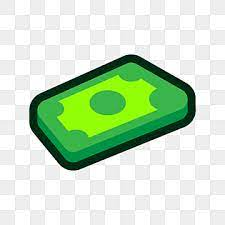

In [23]:
# The test (outliers) image
Image(filename='./test.jpg') 

In [20]:
%matplotlib inline
img = image.load_img("./test.jpg", target_size=(28, 28), color_mode = "grayscale")
input_img = image.img_to_array(img)

inputs = input_img.reshape(1,784)
target_data = autoencoder.predict(inputs)
dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

[6214.5557]


# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-block alert-warning">
<font color=black><br>

- https://towardsdatascience.com/auto-encoder-what-is-it-and-what-is-it-used-for-part-1-3e5c6f017726
- https://towardsdatascience.com/understanding-latent-space-in-machine-learning-de5a7c687d8d 
- http://www.deeplearningbook.org/contents/autoencoders.html 

<br></font>
</div>